# Applied Data Science Capstone Notebook

## Segmenting and Clustering Neighborhoods in Toronto

### Web Scraping

Import essential libraries

In [1]:
import urllib.request
import pandas as pd
import numpy as np

Assign target url

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

Using the urllib.request library, we want to query the page and put the HTML data into a variable (which we have called ‘url’):

In [3]:
page = urllib.request.urlopen(url)

import the functions from Beautiful Soup which will let us parse and work with the HTML we fetched from our Wiki page:

In [4]:
from bs4 import BeautifulSoup

Use Beautiful Soup to parse the HTML data we stored in our ‘url’ variable and store it in a new variable called ‘soup’ in the Beautiful Soup format.

In [5]:
soup = BeautifulSoup(page, "lxml")

Take a look at our underlying HTML code.

In [6]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"c5d20bcb-22f5-4f38-9bd4-7336d846cba1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":969510799,"wgRevisionId":969510799,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Communications in Ontario","Postal codes in Canada","Toron

We know the data resides within an HTML table so firstly we send Beautiful Soup off to retrieve all instances of the <table> tag within the page and add them to an array called all_tables:

In [7]:
all_tables = soup.find_all("table")
all_tables

[<table class="wikitable sortable">
 <tbody><tr>
 <th>Postal Code
 </th>
 <th>Borough
 </th>
 <th>Neighbourhood
 </th></tr>
 <tr>
 <td>M1A
 </td>
 <td>Not assigned
 </td>
 <td>Not assigned
 </td></tr>
 <tr>
 <td>M2A
 </td>
 <td>Not assigned
 </td>
 <td>Not assigned
 </td></tr>
 <tr>
 <td>M3A
 </td>
 <td>North York
 </td>
 <td>Parkwoods
 </td></tr>
 <tr>
 <td>M4A
 </td>
 <td>North York
 </td>
 <td>Victoria Village
 </td></tr>
 <tr>
 <td>M5A
 </td>
 <td>Downtown Toronto
 </td>
 <td>Regent Park, Harbourfront
 </td></tr>
 <tr>
 <td>M6A
 </td>
 <td>North York
 </td>
 <td>Lawrence Manor, Lawrence Heights
 </td></tr>
 <tr>
 <td>M7A
 </td>
 <td>Downtown Toronto
 </td>
 <td>Queen's Park, Ontario Provincial Government
 </td></tr>
 <tr>
 <td>M8A
 </td>
 <td>Not assigned
 </td>
 <td>Not assigned
 </td></tr>
 <tr>
 <td>M9A
 </td>
 <td>Etobicoke
 </td>
 <td>Islington Avenue, Humber Valley Village
 </td></tr>
 <tr>
 <td>M1B
 </td>
 <td>Scarborough
 </td>
 <td>Malvern, Rouge
 </td></tr>
 <tr>
 <td>M2B

Looking through the output of ”all_tables” we can again see that the class id of our chosen table is ”wikitable sortable”. We can use this to get BS to only bring back the table data for this particular table and keep that in a variable called ”right_table“:

In [8]:
right_table = soup.find('table', class_ = 'wikitable sortable')
right_table

<table class="wikitable sortable">
<tbody><tr>
<th>Postal Code
</th>
<th>Borough
</th>
<th>Neighbourhood
</th></tr>
<tr>
<td>M1A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M2A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3A
</td>
<td>North York
</td>
<td>Parkwoods
</td></tr>
<tr>
<td>M4A
</td>
<td>North York
</td>
<td>Victoria Village
</td></tr>
<tr>
<td>M5A
</td>
<td>Downtown Toronto
</td>
<td>Regent Park, Harbourfront
</td></tr>
<tr>
<td>M6A
</td>
<td>North York
</td>
<td>Lawrence Manor, Lawrence Heights
</td></tr>
<tr>
<td>M7A
</td>
<td>Downtown Toronto
</td>
<td>Queen's Park, Ontario Provincial Government
</td></tr>
<tr>
<td>M8A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M9A
</td>
<td>Etobicoke
</td>
<td>Islington Avenue, Humber Valley Village
</td></tr>
<tr>
<td>M1B
</td>
<td>Scarborough
</td>
<td>Malvern, Rouge
</td></tr>
<tr>
<td>M2B
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3B
</td>
<td

There are three columns in our table that we want to scrape the data from so we will set up three empty lists (A, B, and C) to store our data in.

To start with, we want to use the Beautiful Soup ‘find_all’ function again and set it to look for the string ‘tr’. We will then set up a FOR loop for each row within that array and set Python to loop through the rows, one by one.

Within the loop we are going to use find_all again to search each row for <td> tags with the ‘td’ string. We will add all of these to a variable called ‘cells’ and then check to make sure that there are 5 items in our ‘cells’ array (i.e. one for each column).

If there are then we use the find(text=True)) option to extract the content string from within each <td> element in that row and add them to the A-C lists we created at the start of this step.

In [9]:
A=[]
B=[]
C=[]
for row in right_table.findAll('tr'):
    cells = row.findAll('td')
    if len(cells)==3:
        A.append(cells[0].find(text = True))
        B.append(cells[1].find(text = True))
        C.append(cells[2].find(text = True))

Converting extracted data into the pandas dataframe 'df'

In [10]:
df = pd.DataFrame(A,columns =['postal_code'])
df['borough'] = B
df['neighborhood'] = C
df.head()

,postal_code,borough,neighborhood
0,M1A\n,Not assigned\n,Not assigned\n
1,M2A\n,Not assigned\n,Not assigned\n
2,M3A\n,North York\n,Parkwoods\n
3,M4A\n,North York\n,Victoria Village\n
4,M5A\n,Downtown Toronto\n,"Regent Park, Harbourfront\n"


In [11]:
df.drop(df[df['borough']=='Not assigned\n'].index,inplace = True)
df.head()

,postal_code,borough,neighborhood
2,M3A\n,North York\n,Parkwoods\n
3,M4A\n,North York\n,Victoria Village\n
4,M5A\n,Downtown Toronto\n,"Regent Park, Harbourfront\n"
5,M6A\n,North York\n,"Lawrence Manor, Lawrence Heights\n"
6,M7A\n,Downtown Toronto\n,"Queen's Park, Ontario Provincial Government\n"


In [12]:
df.shape

(103, 3)

### Latitude and Longitude Data

In [13]:
!pip install geocoder

In [14]:
import geocoder # import geocoder
df['lat'] = None
df['lon'] = None
df.head()

,postal_code,borough,neighborhood,lat,lon
2,M3A\n,North York\n,Parkwoods\n,None,None
3,M4A\n,North York\n,Victoria Village\n,None,None
4,M5A\n,Downtown Toronto\n,"Regent Park, Harbourfront\n",None,None
5,M6A\n,North York\n,"Lawrence Manor, Lawrence Heights\n",None,None
6,M7A\n,Downtown Toronto\n,"Queen's Park, Ontario Provincial Government\n",None,None


In [15]:
df.index = range(0,103)
df.head()

,postal_code,borough,neighborhood,lat,lon
0,M3A\n,North York\n,Parkwoods\n,None,None
1,M4A\n,North York\n,Victoria Village\n,None,None
2,M5A\n,Downtown Toronto\n,"Regent Park, Harbourfront\n",None,None
3,M6A\n,North York\n,"Lawrence Manor, Lawrence Heights\n",None,None
4,M7A\n,Downtown Toronto\n,"Queen's Park, Ontario Provincial Government\n",None,None


In [16]:
url2 = 'https://cocl.us/Geospatial_data'
df2 = pd.read_csv(url2)
df2.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [17]:
df2.sort_values(by = ['Postal Code'],ascending = True, inplace = True)
df2.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [18]:
df3 = df.sort_values(by = ['postal_code'],ascending = True, inplace = False)
df3.head()

,postal_code,borough,neighborhood,lat,lon
6,M1B\n,Scarborough\n,"Malvern, Rouge\n",None,None
12,M1C\n,Scarborough\n,"Rouge Hill, Port Union, Highland Creek\n",None,None
18,M1E\n,Scarborough\n,"Guildwood, Morningside, West Hill\n",None,None
22,M1G\n,Scarborough\n,Woburn\n,None,None
26,M1H\n,Scarborough\n,Cedarbrae\n,None,None


In [19]:
df3.index = range(0,103)
df3.head()

,postal_code,borough,neighborhood,lat,lon
0,M1B\n,Scarborough\n,"Malvern, Rouge\n",None,None
1,M1C\n,Scarborough\n,"Rouge Hill, Port Union, Highland Creek\n",None,None
2,M1E\n,Scarborough\n,"Guildwood, Morningside, West Hill\n",None,None
3,M1G\n,Scarborough\n,Woburn\n,None,None
4,M1H\n,Scarborough\n,Cedarbrae\n,None,None


In [20]:
df3[['lat','lon']] = df2[['Latitude','Longitude']]
df3.head()

,postal_code,borough,neighborhood,lat,lon
0,M1B\n,Scarborough\n,"Malvern, Rouge\n",43.806686,-79.194353
1,M1C\n,Scarborough\n,"Rouge Hill, Port Union, Highland Creek\n",43.784535,-79.160497
2,M1E\n,Scarborough\n,"Guildwood, Morningside, West Hill\n",43.763573,-79.188711
3,M1G\n,Scarborough\n,Woburn\n,43.770992,-79.216917
4,M1H\n,Scarborough\n,Cedarbrae\n,43.773136,-79.239476


df3 is the required dataframe

In [21]:
df3.head()

,postal_code,borough,neighborhood,lat,lon
0,M1B\n,Scarborough\n,"Malvern, Rouge\n",43.806686,-79.194353
1,M1C\n,Scarborough\n,"Rouge Hill, Port Union, Highland Creek\n",43.784535,-79.160497
2,M1E\n,Scarborough\n,"Guildwood, Morningside, West Hill\n",43.763573,-79.188711
3,M1G\n,Scarborough\n,Woburn\n,43.770992,-79.216917
4,M1H\n,Scarborough\n,Cedarbrae\n,43.773136,-79.239476


### Exploring and Clustering Neighborhoods

In [22]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [23]:
df_toronto = df3[df3['borough'].str.contains('Toronto')]
df_toronto.head()

,postal_code,borough,neighborhood,lat,lon
37,M4E\n,East Toronto\n,The Beaches\n,43.676357,-79.293031
41,M4K\n,East Toronto\n,"The Danforth West, Riverdale\n",43.679557,-79.352188
42,M4L\n,East Toronto\n,"India Bazaar, The Beaches West\n",43.668999,-79.315572
43,M4M\n,East Toronto\n,Studio District\n,43.659526,-79.340923
44,M4N\n,Central Toronto\n,Lawrence Park\n,43.728020,-79.388790


In [24]:
df_toronto.shape

(39, 5)

In [25]:
address = 'Toronto'

geolocator = Nominatim(user_agent="t_explorer")
location = geolocator.geocode(address)
latitude_t = location.latitude
longitude_t = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude_t, longitude_t))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [26]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude_t, longitude_t], zoom_start=10)

# add markers to map
for lat, lon, borough, neighborhood in zip(df_toronto['lat'], df_toronto['lon'], df_toronto['borough'], df_toronto['neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [27]:
CLIENT_ID = 'NYEW35WW1IEBJFIFVTC42AMY55BC1M323ASF0FCL0RUCYJYX' # your Foursquare ID
CLIENT_SECRET = 'WBSZHJWYEWE2XXZKLRANV4NY10PSBK0LP544Z02FPESSVNV1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NYEW35WW1IEBJFIFVTC42AMY55BC1M323ASF0FCL0RUCYJYX
CLIENT_SECRET:WBSZHJWYEWE2XXZKLRANV4NY10PSBK0LP544Z02FPESSVNV1


In [28]:
p =df_toronto.shape[0]
df_toronto.index = range(0,p)

In [29]:
df_toronto.loc[0,'neighborhood']

'The Beaches\n'

In [30]:
neighborhood_latitude = df_toronto.loc[0, 'lat'] # neighborhood latitude value
neighborhood_longitude =df_toronto.loc[0, 'lon'] # neighborhood longitude value

neighborhood_name = df_toronto.loc[0, 'neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of The Beaches
 are 43.67635739999999, -79.2930312.


In [31]:
LIMIT = 100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url


'https://api.foursquare.com/v2/venues/explore?&client_id=NYEW35WW1IEBJFIFVTC42AMY55BC1M323ASF0FCL0RUCYJYX&client_secret=WBSZHJWYEWE2XXZKLRANV4NY10PSBK0LP544Z02FPESSVNV1&v=20180605&ll=43.67635739999999,-79.2930312&radius=500&limit=100'

In [32]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f2130ad5292fd2d2f836a55'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4bd461bc77b29c74a07d9282-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/hikingtrail_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d159941735',
         'name': 'Trail',
         'pluralName': 'Trails',
         'primary': True,
         'shortName': 'Trail'}],
       'id': '4bd461bc77b29c74a07d9282',
       'location': {'address': 'Glen Manor',
        'cc': 'CA',
        'city': 'Toronto',
        'country': 'Canada',
        'crossStreet': 'Queen St.',
        'distance': 89,
        'formattedAddress': ['Glen Manor (Queen St.)', 'Toronto ON', 'Canada'],
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.67682

In [33]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [34]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Glen Manor Ravine,Trail,43.676821,-79.293942
1,The Big Carrot Natural Food Market,Health Food Store,43.678879,-79.297734
2,Grover Pub and Grub,Pub,43.679181,-79.297215
3,Upper Beaches,Neighborhood,43.680563,-79.292869


In [35]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

4 venues were returned by Foursquare.


In [36]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [37]:
toronto_venues = getNearbyVenues(names=df_toronto['neighborhood'],
                                   latitudes=df_toronto['lat'],
                                   longitudes=df_toronto['lon']
                                  )

The Beaches

The Danforth West, Riverdale

India Bazaar, The Beaches West

Studio District

Lawrence Park

Davisville North

North Toronto West,  Lawrence Park

Davisville

Moore Park, Summerhill East

Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park

Rosedale

St. James Town, Cabbagetown

Church and Wellesley

Regent Park, Harbourfront

Garden District, Ryerson

St. James Town

Berczy Park

Central Bay Street

Richmond, Adelaide, King

Harbourfront East, Union Station, Toronto Islands

Toronto Dominion Centre, Design Exchange

Commerce Court, Victoria Hotel

Roselawn

Forest Hill North & West, Forest Hill Road Park

The Annex, North Midtown, Yorkville

University of Toronto, Harbord

Kensington Market, Chinatown, Grange Park

CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport

Stn A PO Boxes

First Canadian Place, Underground city

Christie

Dufferin, Dovercourt Village

Little Portugal, Trinity

Brockton, Parkda

In [38]:
print(toronto_venues.shape)
toronto_venues.head()

(1631, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches\n,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches\n,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches\n,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches\n,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale\n",43.679557,-79.352188,MenEssentials,43.677820,-79.351265,Cosmetics Shop


In [39]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park\n,58,58,58,58,58,58
"Brockton, Parkdale Village, Exhibition Place\n",23,23,23,23,23,23
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto\n",13,13,13,13,13,13
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport\n",14,14,14,14,14,14
Central Bay Street\n,62,62,62,62,62,62
Christie\n,17,17,17,17,17,17
Church and Wellesley\n,76,76,76,76,76,76
"Commerce Court, Victoria Hotel\n",100,100,100,100,100,100
Davisville\n,35,35,35,35,35,35


In [40]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 233 uniques categories.


In [41]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,The Beaches\n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [42]:
toronto_onehot.shape

(1631, 233)

In [43]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,Berczy Park\n,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017241,0.000000,0.00,0.017241,0.000000,0.000000,0.000000,0.000000,0.000000,0.017241,0.000000,0.017241,0.034483,0.000000,0.000000,0.00,0.017241,0.017241,0.000000,0.034483,0.000000,0.000000,0.017241,0.000000,0.000000,0.000000,0.000000,0.00,0.017241,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.034483,0.00,0.000000,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.086207,0.000000,0.000000,0.000000,0.00,0.00,0.017241,0.000000,0.017241,0.000000,0.00,0.000000,0.000000,0.000,0.017241,0.000000,0.000000,0.000000,0.000000,0.017241,0

In [44]:
toronto_grouped.shape

(39, 233)

In [45]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park
----
                venue  freq
0         Coffee Shop  0.09
1                Café  0.03
2         Cheese Shop  0.03
3      Farmers Market  0.03
4  Seafood Restaurant  0.03


----Brockton, Parkdale Village, Exhibition Place
----
            venue  freq
0            Café  0.13
1     Coffee Shop  0.09
2       Nightclub  0.09
3  Breakfast Spot  0.09
4   Grocery Store  0.04


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto
----
                  venue  freq
0            Comic Shop  0.08
1            Restaurant  0.08
2        Farmers Market  0.08
3  Fast Food Restaurant  0.08
4                  Park  0.08


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
----
              venue  freq
0    Airport Lounge  0.14
1   Airport Service  0.14
2  Airport Terminal  0.14
3     Boat or Ferry  0.07
4          Boutique  0.07


----Central Bay Street
----
                 venue  freq
0 

In [46]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [47]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park\n,Coffee Shop,Seafood Restaurant,Cheese Shop,Farmers Market,Beer Bar,Bakery,Restaurant,Café,Cocktail Bar,Indian Restaurant
1,"Brockton, Parkdale Village, Exhibition Place\n",Café,Coffee Shop,Nightclub,Breakfast Spot,Stadium,Restaurant,Bakery,Intersection,Italian Restaurant,Climbing Gym
2,"Business reply mail Processing Centre, South C...",Park,Garden,Brewery,Farmers Market,Fast Food Restaurant,Burrito Place,Restaurant,Auto Workshop,Pizza Place,Skate Park
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Lounge,Airport Service,Airport Terminal,Coffee Shop,Harbor / Marina,Boat or Ferry,Sculpture Garden,Rental Car Location,Boutique,Airport Food Court
4,Central Bay Street\n,Coffee Shop,Sandwich Place,Café,Italian Restaurant,Bubble Tea Shop,Japanese Restaurant,Department Store,Salad Place,Burger Joint,Discount Store


In [48]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park\n,Coffee Shop,Seafood Restaurant,Cheese Shop,Farmers Market,Beer Bar,Bakery,Restaurant,Café,Cocktail Bar,Indian Restaurant
1,"Brockton, Parkdale Village, Exhibition Place\n",Café,Coffee Shop,Nightclub,Breakfast Spot,Stadium,Restaurant,Bakery,Intersection,Italian Restaurant,Climbing Gym
2,"Business reply mail Processing Centre, South C...",Park,Garden,Brewery,Farmers Market,Fast Food Restaurant,Burrito Place,Restaurant,Auto Workshop,Pizza Place,Skate Park
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Lounge,Airport Service,Airport Terminal,Coffee Shop,Harbor / Marina,Boat or Ferry,Sculpture Garden,Rental Car Location,Boutique,Airport Food Court
4,Central Bay Street\n,Coffee Shop,Sandwich Place,Café,Italian Restaurant,Bubble Tea Shop,Japanese Restaurant,Department Store,Salad Place,Burger Joint,Discount Store


In [50]:
# set number of clusters
kclusters = 4

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2], dtype=int32)

In [51]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_merged = df_toronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='neighborhood')

toronto_merged.head() # check the last columns!

,postal_code,borough,neighborhood,lat,lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E\n,East Toronto\n,The Beaches\n,43.676357,-79.293031,0,Trail,Health Food Store,Pub,Women's Store,Cupcake Shop,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center
1,M4K\n,East Toronto\n,"The Danforth West, Riverdale\n",43.679557,-79.352188,2,Greek Restaurant,Coffee Shop,Italian Restaurant,Ice Cream Shop,Furniture / Home Store,Restaurant,Bubble Tea Shop,Bakery,Pub,Pizza Place
2,M4L\n,East Toronto\n,"India Bazaar, The Beaches West\n",43.668999,-79.315572,2,Park,Board Shop,Food & Drink Shop,Sandwich Place,Light Rail Station,Italian Restaurant,Burrito Place,Liquor Store,Restaurant,Ice Cream Shop
3,M4M\n,East Toronto\n,Studio District\n,43.659526,-79.340923,2,Café,Coffee Shop,Gastropub,Bakery,Brewery,American Restaurant,Yoga Studio,Comfort Food Restaurant,Seafood Restaurant,Sandwich Place
4,M4N\n,Central Toronto\n,Lawrence Park\n,43.728020,-79.388790,1,Park,Swim School,Bus Line,Electronics Store,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center,Discount Store


In [52]:
# create map
map_clusters = folium.Map(location=[latitude_t, longitude_t], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['lat'], toronto_merged['lon'], toronto_merged['neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [53]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [64]:
df_test = df_toronto
df_test.head()

,postal_code,borough,neighborhood,lat,lon
0,M4E\n,East Toronto\n,The Beaches\n,43.676357,-79.293031
1,M4K\n,East Toronto\n,"The Danforth West, Riverdale\n",43.679557,-79.352188
2,M4L\n,East Toronto\n,"India Bazaar, The Beaches West\n",43.668999,-79.315572
3,M4M\n,East Toronto\n,Studio District\n,43.659526,-79.340923
4,M4N\n,Central Toronto\n,Lawrence Park\n,43.728020,-79.388790


In [59]:
!apt install proj-bin libproj-dev libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz
from mpl_toolkits.basemap import Basemap

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev libproj-dev proj-bin
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 305 kB of archives.
After this operation, 1,706 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 305 kB in 1s (256 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144465 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3

ImportError: ignored

In [62]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
     / 210.2MB 117.4MB/s
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756019 sha256=0745438bd105943e26c7a7dcba0914efe59ee8ea848a90b86415534e8034bfd3
  Stored in directory: /tmp/pip-ephem-wheel-cache-9x6mf1cn/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap
  Found existing installation: basemap 1.1.0
    Uninsta

In [1]:
!pip install pyproj==1.9.6

     |████████████████████████████████| 2.8MB 4.5MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702096 sha256=6da47158a05ab3fc153c6c2f67b0595bf68cd97e504adb6cdc342e2facac3943
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 2.6.1.post1
    Uninstalling pyproj-2.6.1.post1:
      Successfully uninstalled pyproj-2.6.1.post1


In [55]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

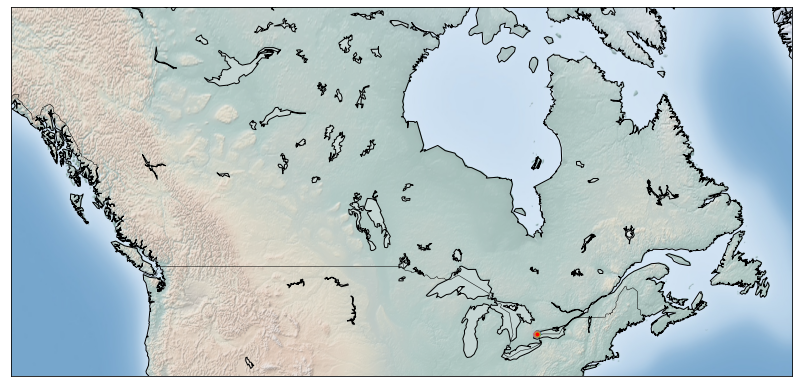

In [66]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

llon=-140
ulon=-50
llat=40
ulat=65

df_test = df_test[(df_test['lon'] > llon) & (df_test['lon'] < ulon) & (df_test['lat'] > llat) &(df_test['lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
# my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        

xs,ys = my_map(np.asarray(df_test.lon), np.asarray(df_test.lat))
df_test['xm']= xs.tolist()
df_test['ym'] =ys.tolist()

#Visualization1
for index,row in df_test.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()

In [98]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = df_test[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.55, min_samples=3).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_test["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
df_test[["postal_code","borough","neighborhood",'lat','lon',"Clus_Db"]].head(5)

,postal_code,borough,neighborhood,lat,lon,Clus_Db
0,M4E\n,East Toronto\n,The Beaches\n,43.676357,-79.293031,-1
1,M4K\n,East Toronto\n,"The Danforth West, Riverdale\n",43.679557,-79.352188,-1
2,M4L\n,East Toronto\n,"India Bazaar, The Beaches West\n",43.668999,-79.315572,3
3,M4M\n,East Toronto\n,Studio District\n,43.659526,-79.340923,3
4,M4N\n,Central Toronto\n,Lawrence Park\n,43.728020,-79.388790,-1


In [99]:
len(set(labels))

5

In [100]:
# create map
map_clusters = folium.Map(location=[latitude_t, longitude_t], zoom_start=11)

# set color scheme for the clusters
x = np.arange(len(set(labels)))
ys = [i + x + (i*x)**2 for i in range(len(set(labels)))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_test['lat'], df_test['lon'], df_test['neighborhood'], df_test['Clus_Db']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters